<a href="https://colab.research.google.com/github/ihdamaulidianf/Data-Business-Analysist/blob/main/Uji_Keterampilan_G2Academy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library dan Observasi**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
uk=pd.read_csv('/content/drive/MyDrive/ukcar.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
uk

In [ ]:
uk.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

# **EDA**

In [ ]:
uk.isnull().sum().sum()

0

In [ ]:
uk.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
uk['normalized-losses'].loc[uk['normalized-losses'] == '?'].count()

41

In [ ]:
nl = uk['normalized-losses'].loc[uk['normalized-losses'] != '?']
nlmean = nl.astype(str).astype(int).mean()
uk['normalized-losses'] = uk['normalized-losses'].replace('?',nlmean).astype(int)
uk['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int64

In [ ]:
uk['price'].str.isnumeric().value_counts()

price
True     201
False      4
Name: count, dtype: int64

In [ ]:
uk['price'].loc[uk['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [ ]:
price = uk['price'].loc[uk['price'] != '?']
pmean = price.astype(str).astype(int).mean()
uk['price'] = uk['price'].replace('?',pmean).astype(int)
uk['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

In [ ]:
uk['horsepower'].str.isnumeric().value_counts()
horsepower = uk['horsepower'].loc[uk['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
uk['horsepower'] = uk['horsepower'].replace('?',pmean).astype(int)

In [ ]:
uk.loc[uk['horsepower'] > 10000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,122,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,13207,?,23,31,9295
131,2,122,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,13207,?,23,31,9895


In [ ]:
uk[np.abs(uk.horsepower-uk.horsepower.mean())<=(3*uk.horsepower.std())]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
uk['bore'] = pd.to_numeric(uk['bore'],errors='coerce')
uk.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower             int64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [ ]:
uk['stroke'] = pd.to_numeric(uk['stroke'],errors='coerce')
uk.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [ ]:
uk['peak-rpm'] = pd.to_numeric(uk['peak-rpm'],errors='coerce')
uk.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [ ]:
uk['num-of-doors'].loc[uk['num-of-doors'] == '?']
uk = uk[uk['num-of-doors'] != '?']
uk['num-of-doors'].loc[uk['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

In [ ]:
%matplotlib inline

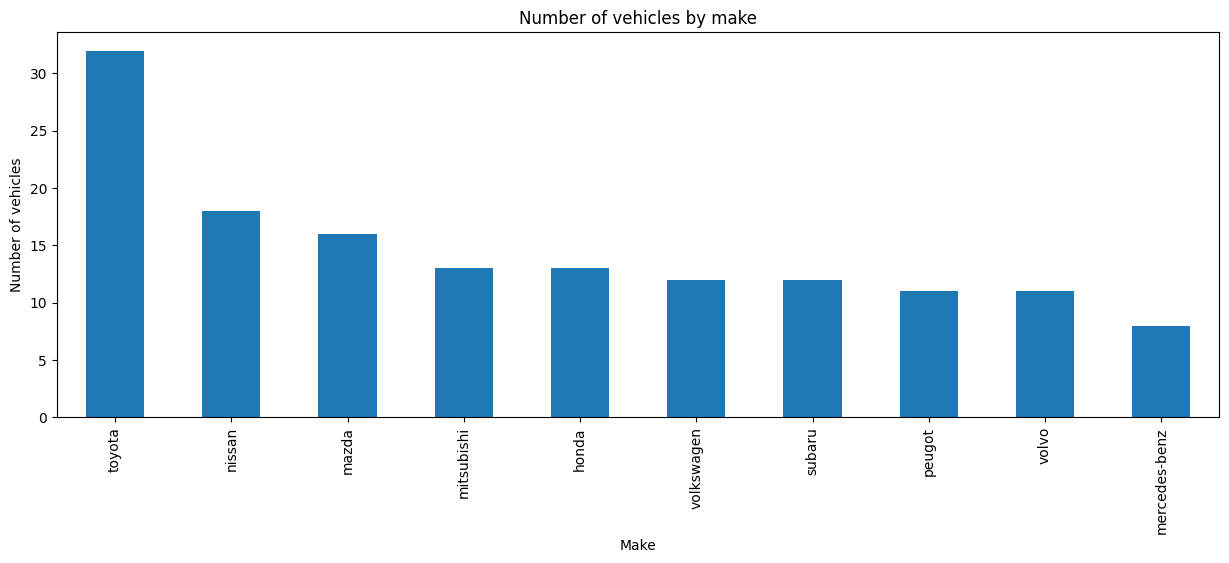

In [ ]:
uk.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

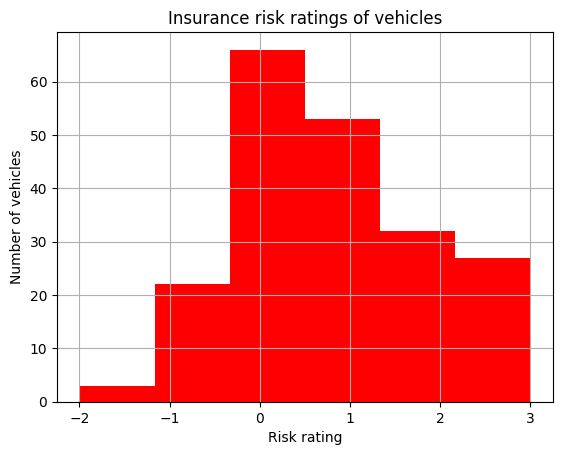

In [ ]:
uk.symboling.hist(bins=6,color='red');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating');


Text(0, 0.5, 'Number of vehicles')

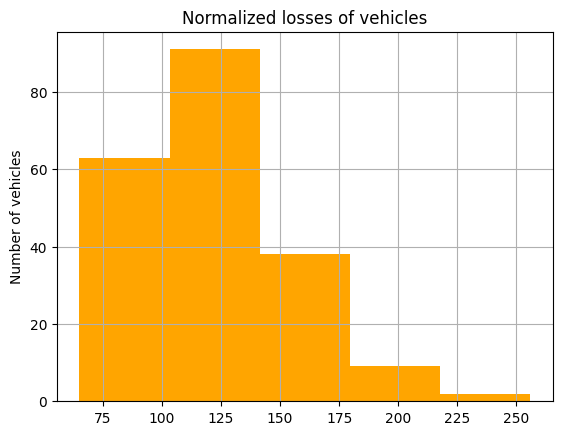

In [ ]:
uk['normalized-losses'].hist(bins=5,color='orange');
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')

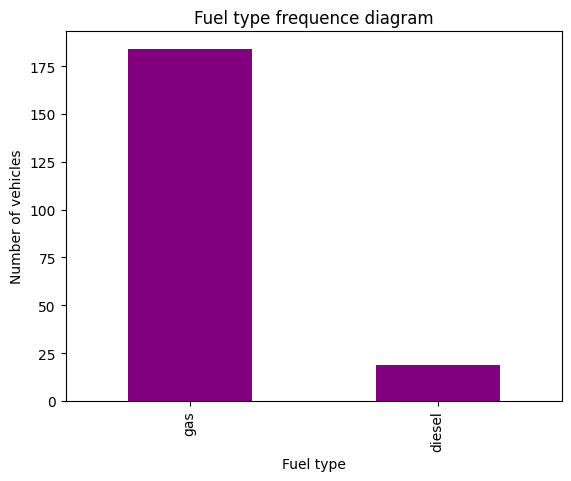

In [ ]:
uk['fuel-type'].value_counts().plot(kind='bar',color='purple')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

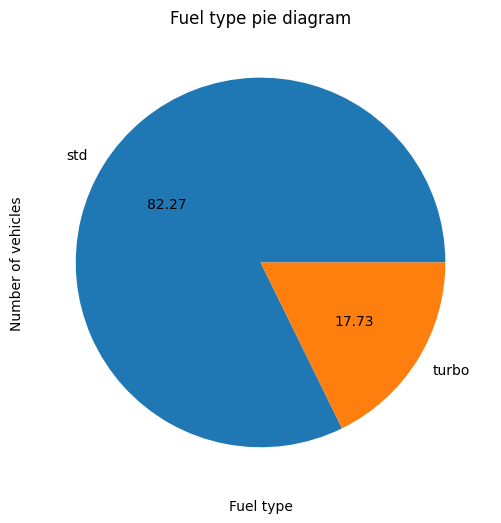

In [ ]:
uk['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

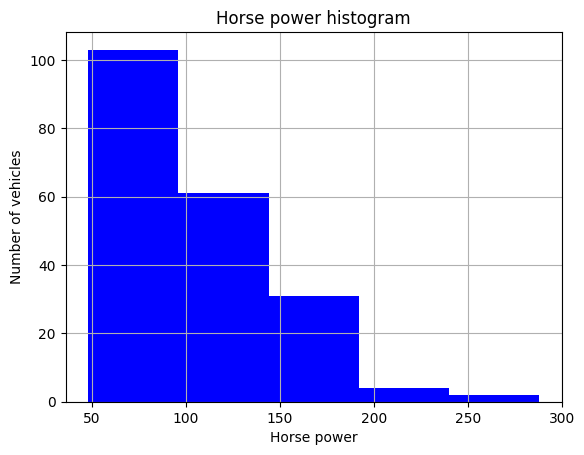

In [ ]:
uk.horsepower[np.abs(uk.horsepower-uk.horsepower.mean())<=(3*uk.horsepower.std())].hist(bins=5,color='blue');
plt.title("Horse power histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Horse power');

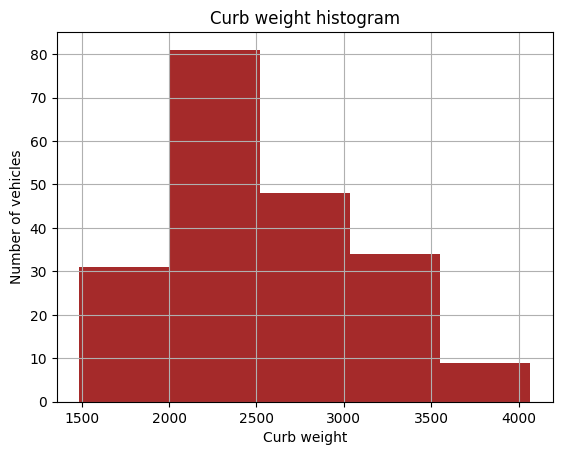

In [ ]:
uk['curb-weight'].hist(bins=5,color='brown');
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight');

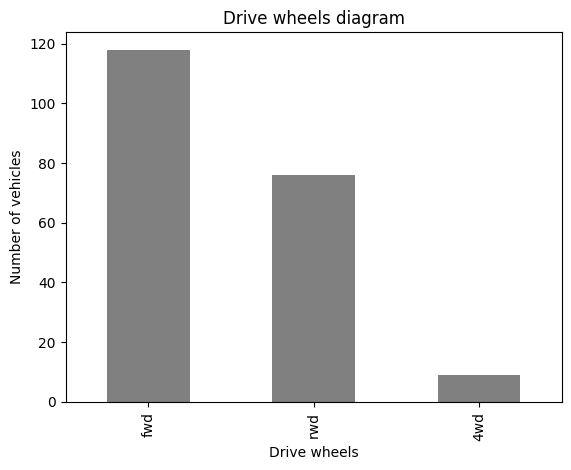

In [ ]:
uk['drive-wheels'].value_counts().plot(kind='bar',color='grey')
plt.title("Drive wheels diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Drive wheels');

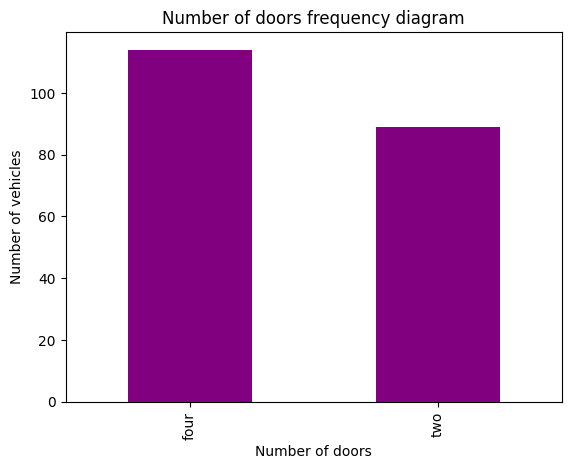

In [ ]:
uk['num-of-doors'].value_counts().plot(kind='bar',color='purple')
plt.title("Number of doors frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Number of doors');

Findings¶
We have taken some key features of the automobile dataset for this analysis and below are our findings.

1. Toyota is the make of the car which has most number of vehicles with more than 40% than the 2nd highest Nissan
2. Most preferred fuel type for the customer is standard vs trubo having more than 80% of the choice
3. For drive wheels, front wheel drive has most number of cars followed by rear wheel and four wheel. There are very less number of cars for four wheel drive.
4. Curb weight of the cars are distributed between 1500 and 4000 approximately
5. Symboling or the insurance risk rating have the ratings between -3 and 3 however for our dataset it starts from -2. There are more cars in the range of 0 and 1.
6. Normalized losses which is the average loss payment per insured vehicle year is has more number of cars in the range between 65 and 15

<Axes: >

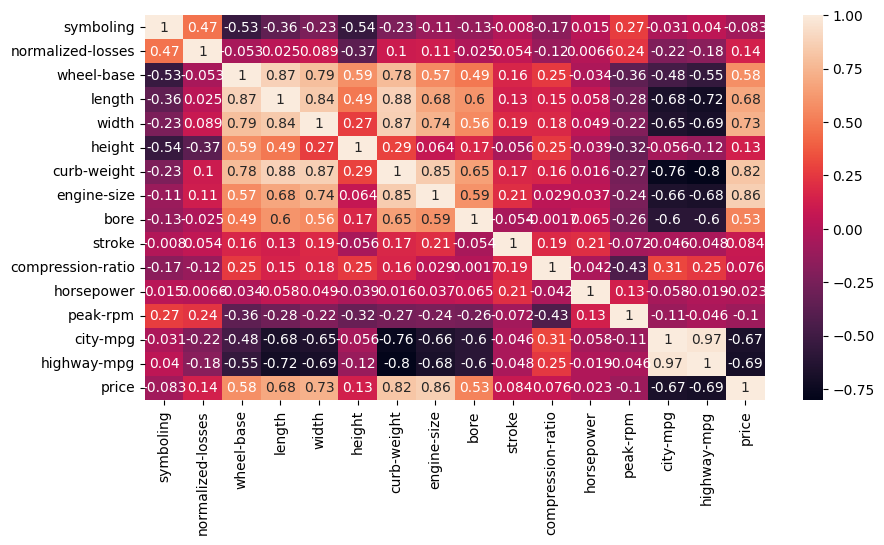

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.heatmap(uk.corr(numeric_only=True), annot=True) #pakai heatmap

Findings: There are some good inferences we can take it from the correlation heat map.

1. Price is more correlated with engine size and curb weight of the car
2. Curb weight is mostly correlated with engine size, length, width and wheel based which is expected as these adds up the weight of the car
3. Wheel base is highly correlated with length and width of the car
4. Symboling and normalized car are correlated than the other fields

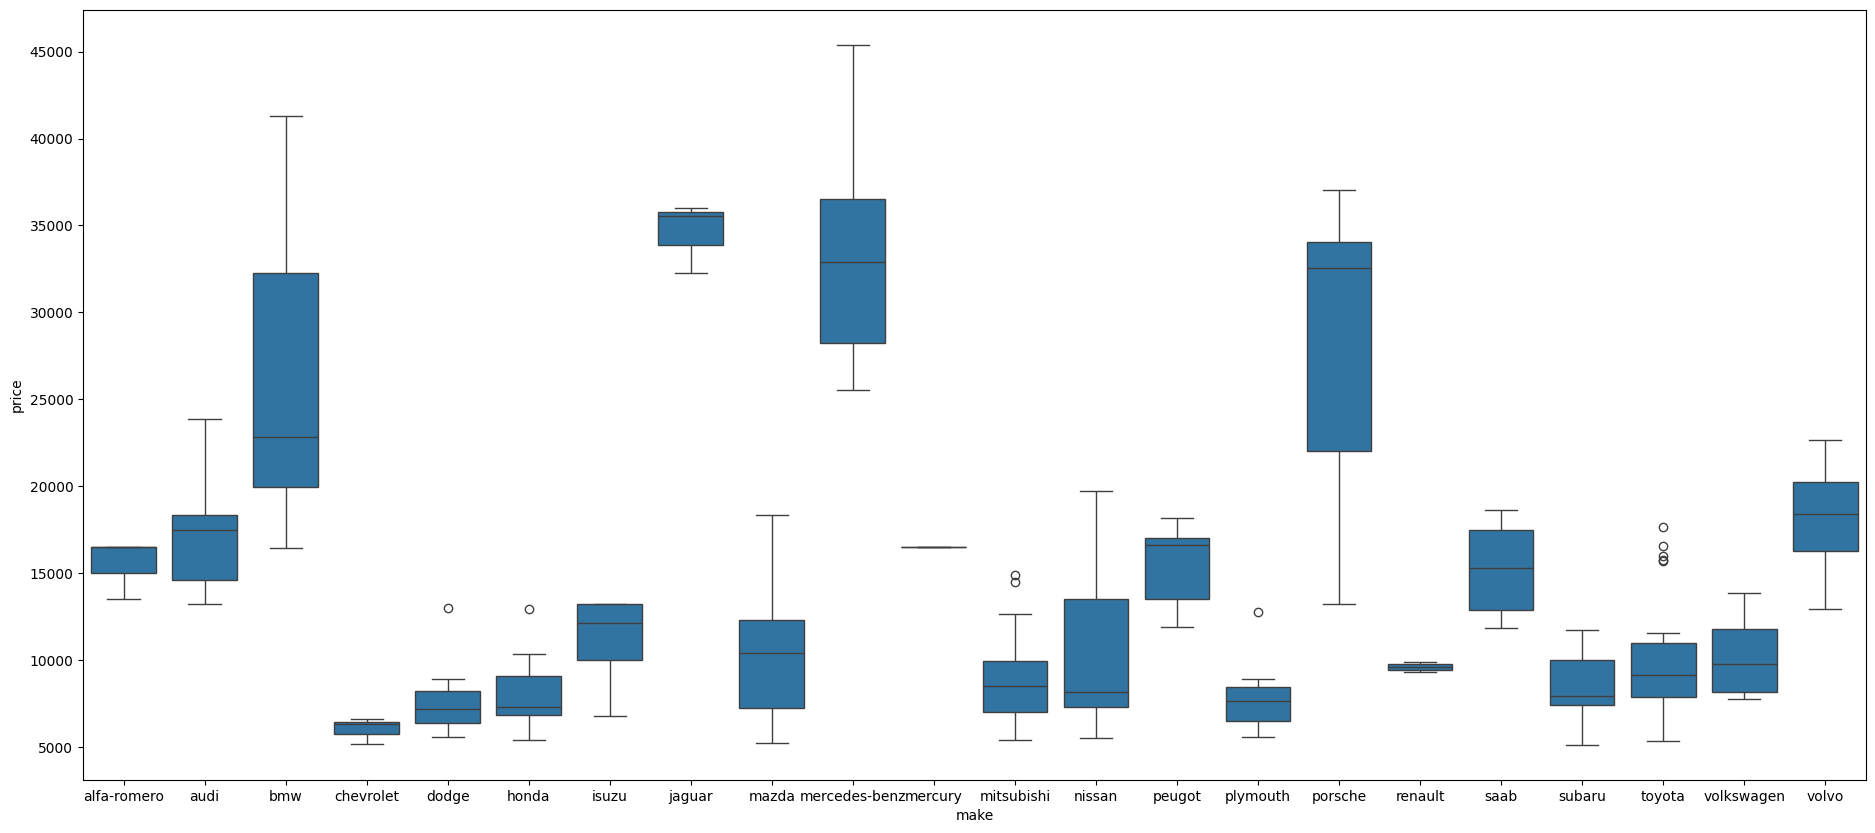

In [ ]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=uk)

Boxplot of Price and make¶
Findings: Below are our findings on the make and price of the car
1. The most expensive car is manufacture by Mercedes benz and the least expensive is Chevrolet
2. The premium cars costing more than 20000 are BMW, Jaquar, Mercedes benz and Porsche
3. Less expensive cars costing less than 10000 are Chevrolet, Dodge, Honda, Mitsubishi, Plymoth and Subaru
4. Rest of the cars are in the midrange between 10000 and 20000 which has the highest number of cars

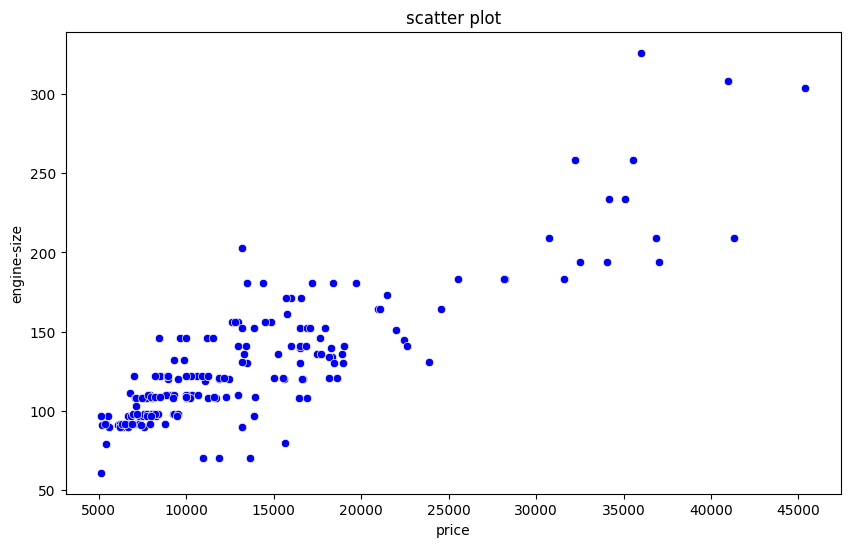

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='engine-size', data=uk, color='blue', marker='o')

# Menambahkan judul dan label
plt.title('scatter plot')
plt.xlabel('price')
plt.ylabel('engine-size')

# Menampilkan scatter plot
plt.show()

Scatter plot of price and engine size

Findings: The more the engine size the costlier the price is

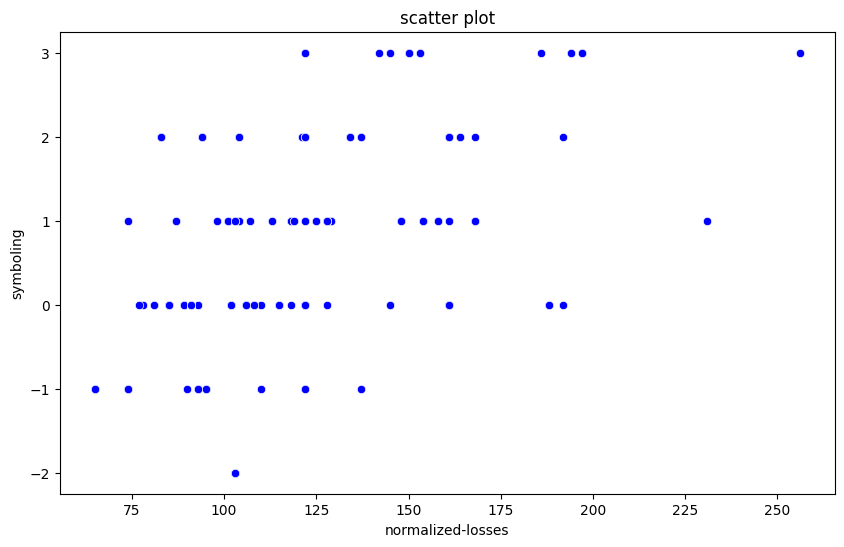

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='normalized-losses', y='symboling', data=uk, color='blue', marker='o')

# Menambahkan judul dan label
plt.title('scatter plot')
plt.xlabel('normalized-losses')
plt.ylabel('symboling')

# Menampilkan scatter plot
plt.show()

Scatter plot of normalized losses and symboling

Findings: From the scattered plot, it's very evident that the lesser the rating lesser the normalized loss. It looks like the negative ratings are better for the car which has lesser losses.

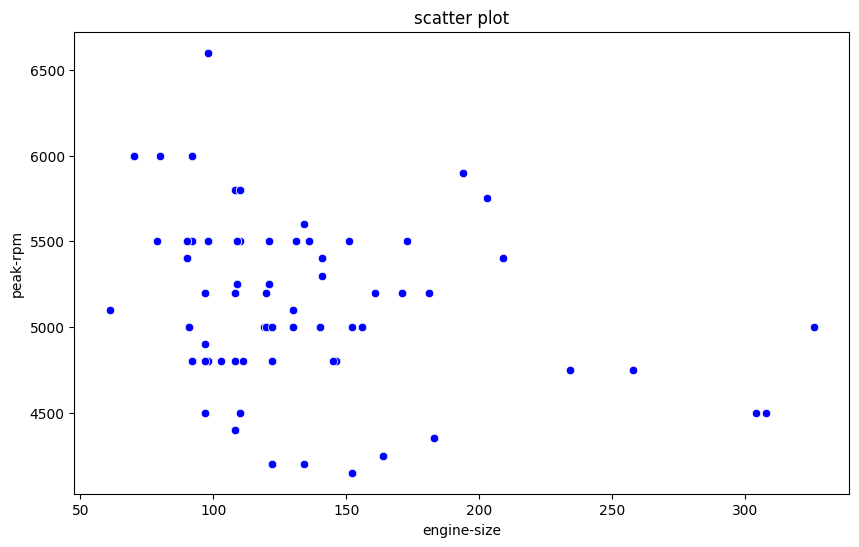

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engine-size', y='peak-rpm', data=uk, color='blue', marker='o')

# Menambahkan judul dan label
plt.title('scatter plot')
plt.xlabel('engine-size')
plt.ylabel('peak-rpm')

# Menampilkan scatter plot
plt.show()

Scatter plot of Engine size and Peak RPM

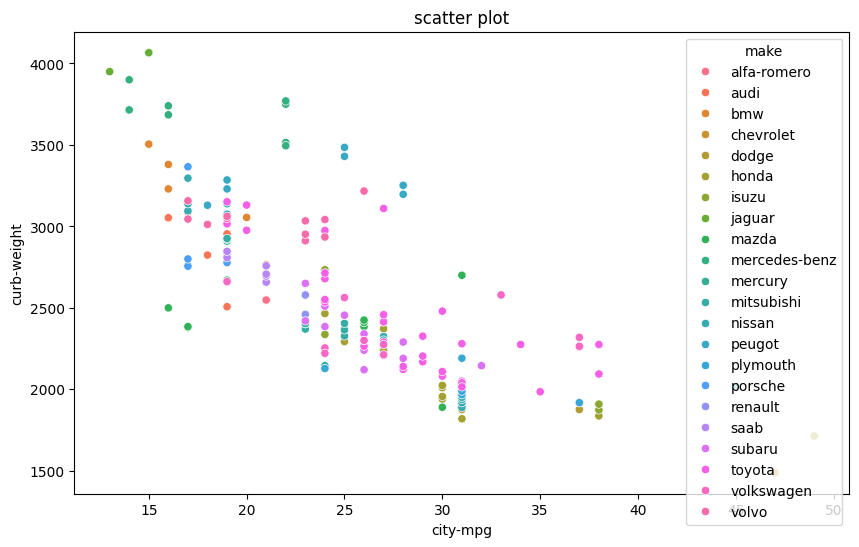

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='city-mpg', y='curb-weight',hue="make", data=uk, color='blue', marker='o')

# Menambahkan judul dan label
plt.title('scatter plot')
plt.xlabel('city-mpg')
plt.ylabel('curb-weight')

# Menampilkan scatter plot
plt.show()

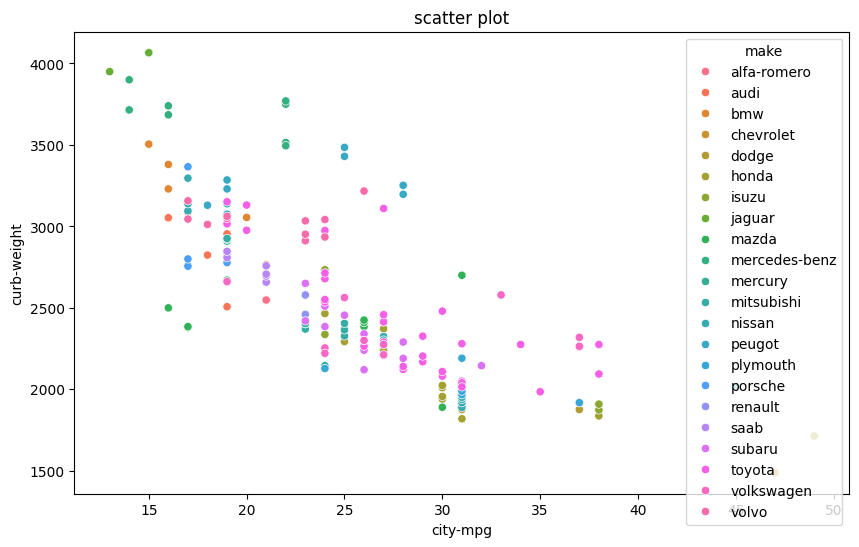

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='city-mpg', y='curb-weight',hue="make", data=uk, color='blue', marker='o')

# Menambahkan judul dan label
plt.title('scatter plot')
plt.xlabel('city-mpg')
plt.ylabel('curb-weight')

# Menampilkan scatter plot
plt.show()

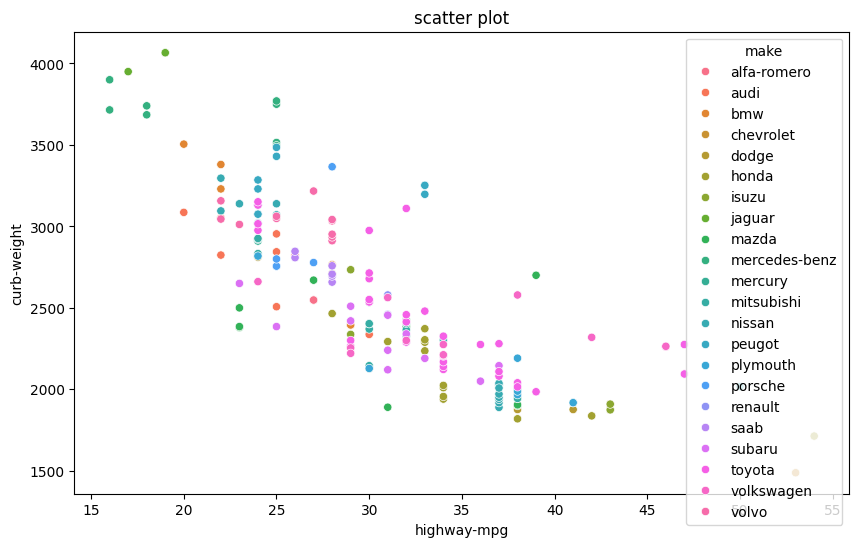

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='highway-mpg', y='curb-weight',hue="make", data=uk, color='blue', marker='o')

# Menambahkan judul dan label
plt.title('scatter plot')
plt.xlabel('highway-mpg')
plt.ylabel('curb-weight')

# Menampilkan scatter plot
plt.show()

Scatter plot of City and Highway MPG, Curb weight based on Make of the car

1. Based on the scatter plot and the provided data set, it is clear that for both city and highway mileage of the automobile is inversely proportional to the curb weight.

2. Heavier the Automobile less is the mileage for both City and Highway

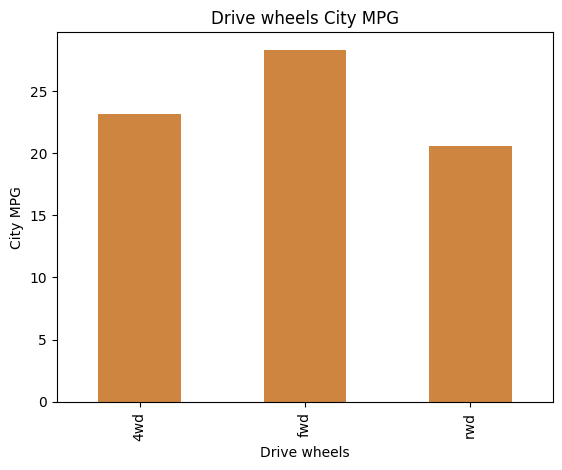

In [ ]:
uk.groupby('drive-wheels')['city-mpg'].mean().plot(kind='bar', color = 'peru');
plt.title("Drive wheels City MPG")
plt.ylabel('City MPG')
plt.xlabel('Drive wheels');

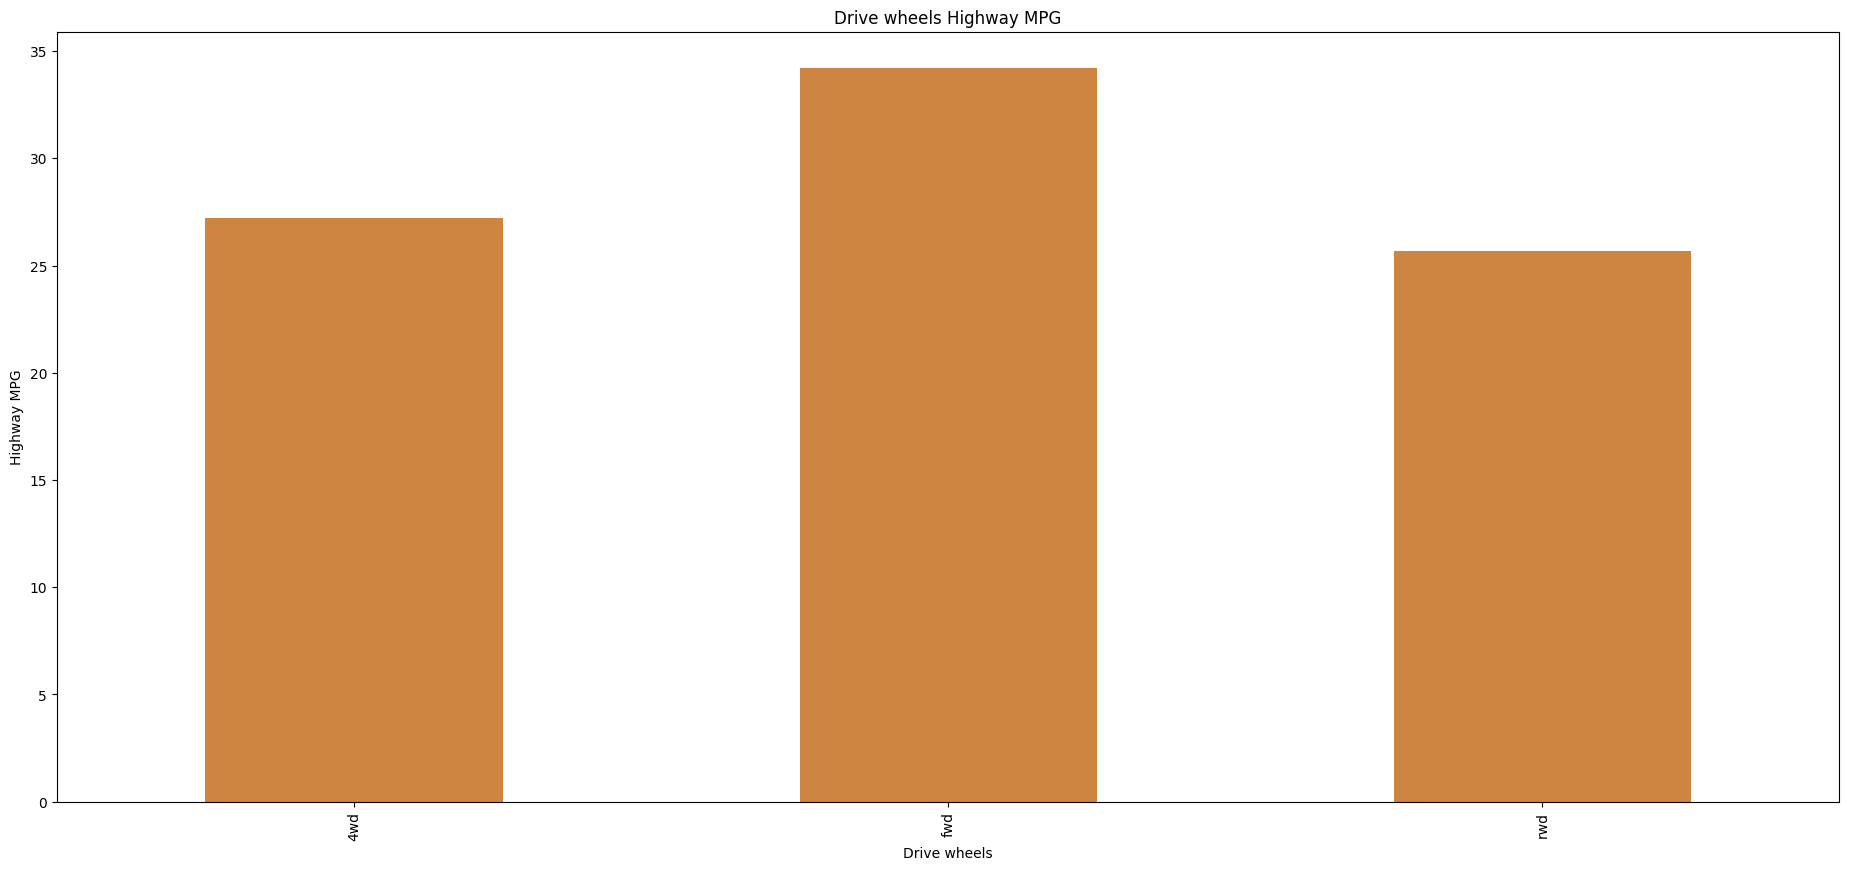

In [ ]:
uk.groupby('drive-wheels')['highway-mpg'].mean().plot(kind='bar', color = 'peru');
plt.title("Drive wheels Highway MPG")
plt.ylabel('Highway MPG')
plt.xlabel('Drive wheels');

Boxplot of Drive wheels and Price

Findings: It's very evident that the Real wheel drive cars are most expensive and front wheel is least expensive cars. Four wheel drive cars are little higher than the front wheel drive cars. There is very less number of four wheel drive cars in our dataset so this picture might not be very accurate.

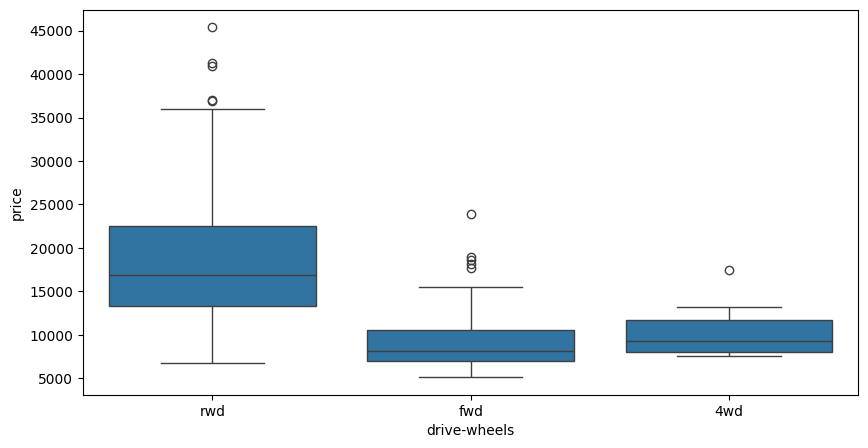

In [ ]:
plt.rcParams['figure.figsize']=(10,5)
ax = sns.boxplot(x="drive-wheels", y="price", data=uk)

Boxplot of Drive wheels and Price

Findings: It's very evident that the Real wheel drive cars are most expensive and front wheel is least expensive cars. Four wheel drive cars are little higher than the front wheel drive cars. There is very less number of four wheel drive cars in our dataset so this picture might not be very accurate.

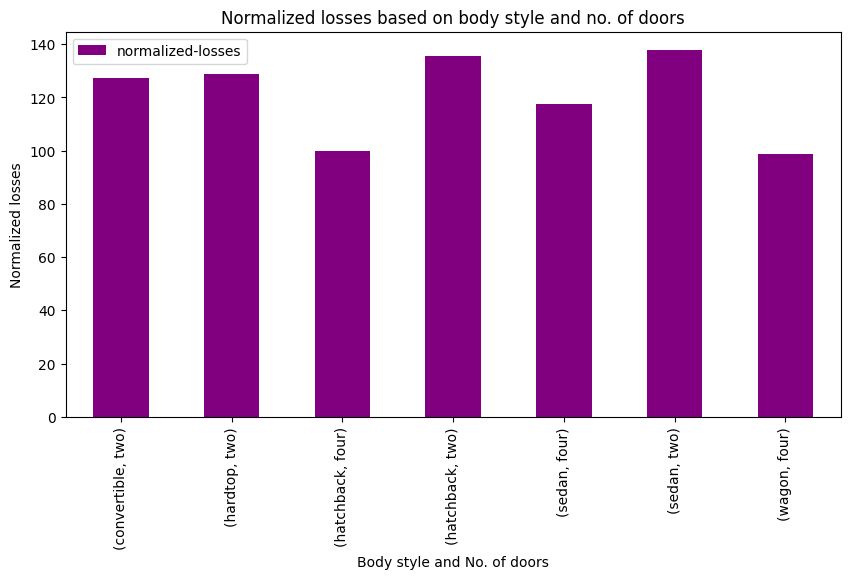

In [ ]:
pd.pivot_table(uk,index=['body-style','num-of-doors'], values='normalized-losses').plot(kind='bar',color='purple')
plt.title("Normalized losses based on body style and no. of doors")
plt.ylabel('Normalized losses')
plt.xlabel('Body style and No. of doors');

Normalized losses based on body style and no. of doors

Findings: As we understand the normalized loss which is the average loss payment per insured vehicle is calculated with many features of the cars which includes body style and no. of doors. Normalized losses are distributed across different body style but the two door cars has more number of losses than the four door cars.

Conclusion

Analysis of the data set provides

1. How the data set are distributed
2. Correlation between different fields and how they are related
3. Normalized loss of the manufacturer
4. Symboling : Cars are initially assigned a risk factor symbol associated with its price
5. Mileage : Mileage based on City and Highway driving for various make and attributes
6. Price : Factors affecting Price of the Automobile.
7. Importance of drive wheels and curb weight

In [ ]:
uk.to_excel("ukcar.xlsx")

In [ ]:
files.download("ukcar.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **UJI KETERAMPILAN**

JENIS MOBIL TEBANYAK

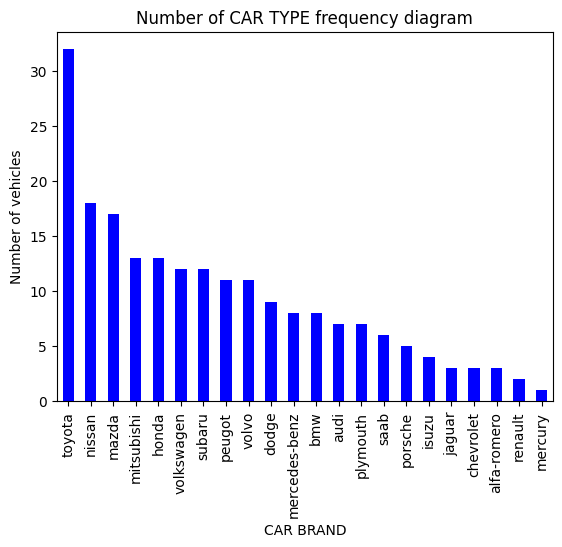

In [ ]:
uk['make'].value_counts().plot(kind='bar',color='blue')
plt.title("Number of CAR TYPE frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('CAR BRAND');

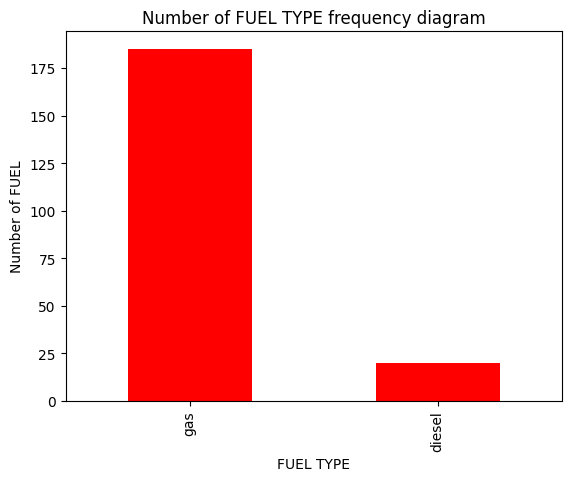

In [ ]:
uk['fuel-type'].value_counts().plot(kind='bar',color='red')
plt.title("Number of FUEL TYPE frequency diagram")
plt.ylabel('Number of FUEL')
plt.xlabel('FUEL TYPE');

     symboling normalized-losses   make fuel-type aspiration num-of-doors  \
204         -1                95  volvo       gas      turbo         four   
199         -1                74  volvo       gas      turbo         four   
194         -2               103  volvo       gas        std         four   
195         -1                74  volvo       gas        std         four   
196         -2               103  volvo       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
204      sedan          rwd           front       109.1  ...          141   
199      wagon          rwd           front       104.3  ...          130   
194      sedan          rwd           front       104.3  ...          141   
195      wagon          rwd           front       104.3  ...          141   
196      sedan          rwd           front       104.3  ...          141   

     fuel-system  bore  stroke compression-ratio horsepower  peak-rpm  \
2

<ipython-input-45-81431b9c92e1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='horsepower', y='make', data=uk, palette='viridis')


Text(0, 0.5, 'Horse Power')

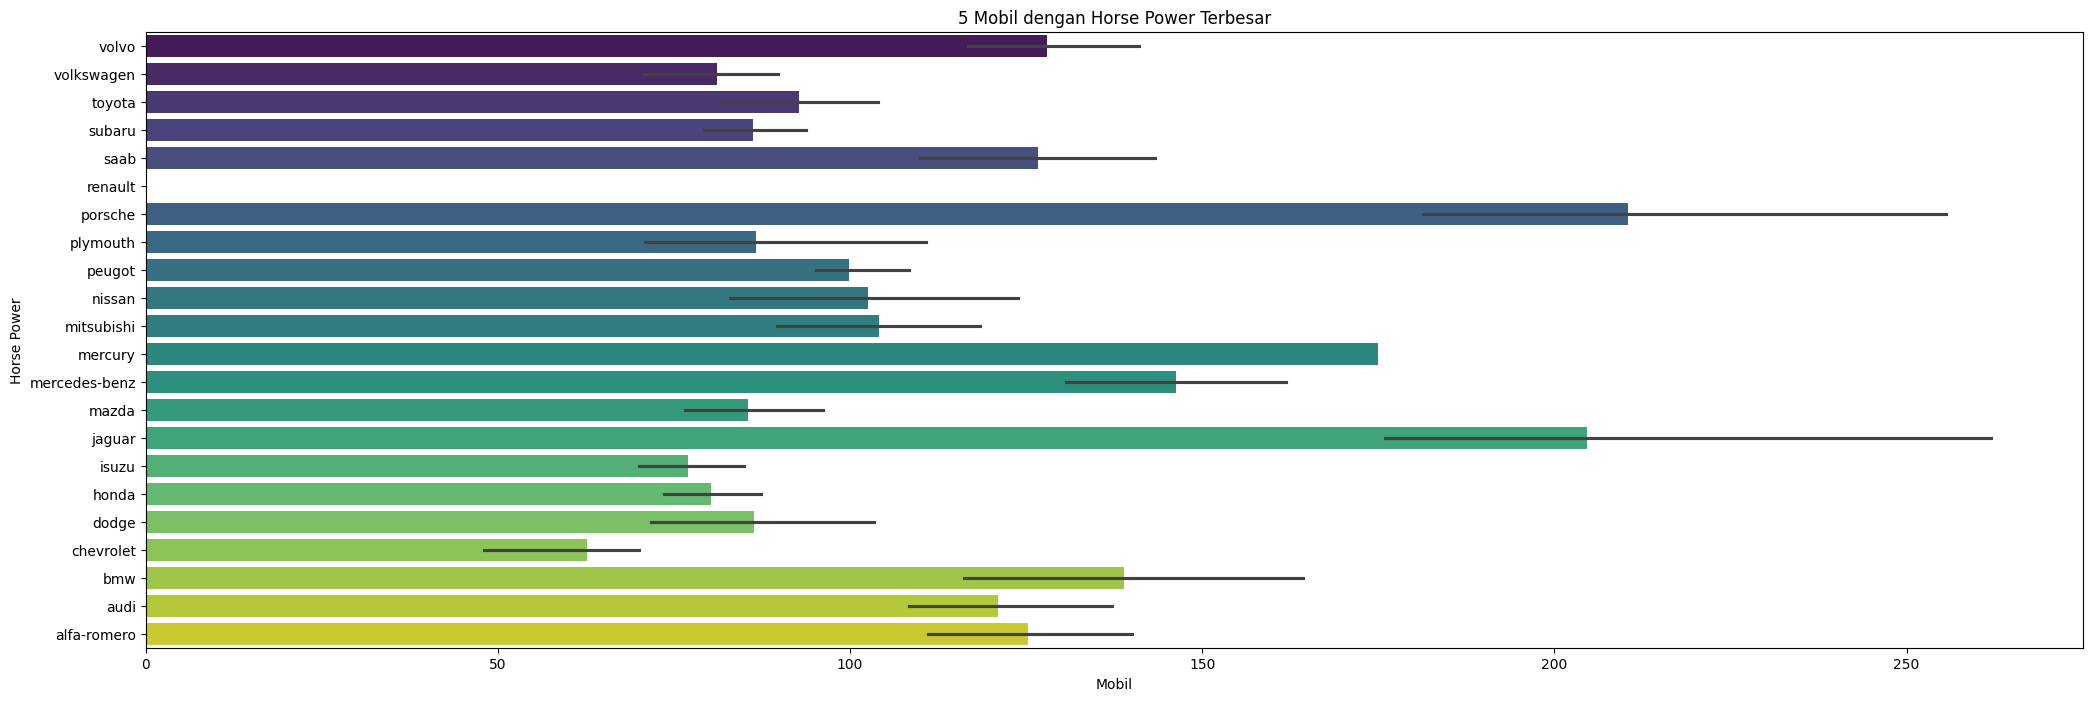

In [ ]:
# Mengubah kolom horse power menjadi tipe numerik
uk['horsepower'] = pd.to_numeric(uk['horsepower'], errors='coerce')

# Mengurutkan data berdasarkan horse power secara menurun
uk = uk.sort_values(by='make', ascending=False)

# Memilih 5 mobil dengan horse power terbesar
top_5_hp = uk.head(5)
print(top_5_hp)

# Membuat bar chart dengan seaborn
plt.figure(figsize=(25, 8))
sns.barplot(x='horsepower', y='make', data=uk, palette='viridis')

# Menambahkan judul dan label
plt.title('5 Mobil dengan Horse Power Terbesar')
plt.xlabel('Mobil')
plt.ylabel('Horse Power')

     symboling normalized-losses   make fuel-type aspiration num-of-doors  \
194         -2               103  volvo       gas        std         four   
202         -1                95  volvo       gas        std         four   
196         -2               103  volvo       gas        std         four   
200         -1                95  volvo       gas        std         four   
198         -2               103  volvo       gas      turbo         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
194      sedan          rwd           front       104.3  ...          141   
202      sedan          rwd           front       109.1  ...          173   
196      sedan          rwd           front       104.3  ...          141   
200      sedan          rwd           front       109.1  ...          141   
198      sedan          rwd           front       104.3  ...          130   

     fuel-system  bore  stroke compression-ratio horsepower  peak-rpm  \
1

<ipython-input-39-0e449fcfa1d4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='make', data=uk, palette='viridis')


Text(0, 0.5, 'Jumlah Mobil')

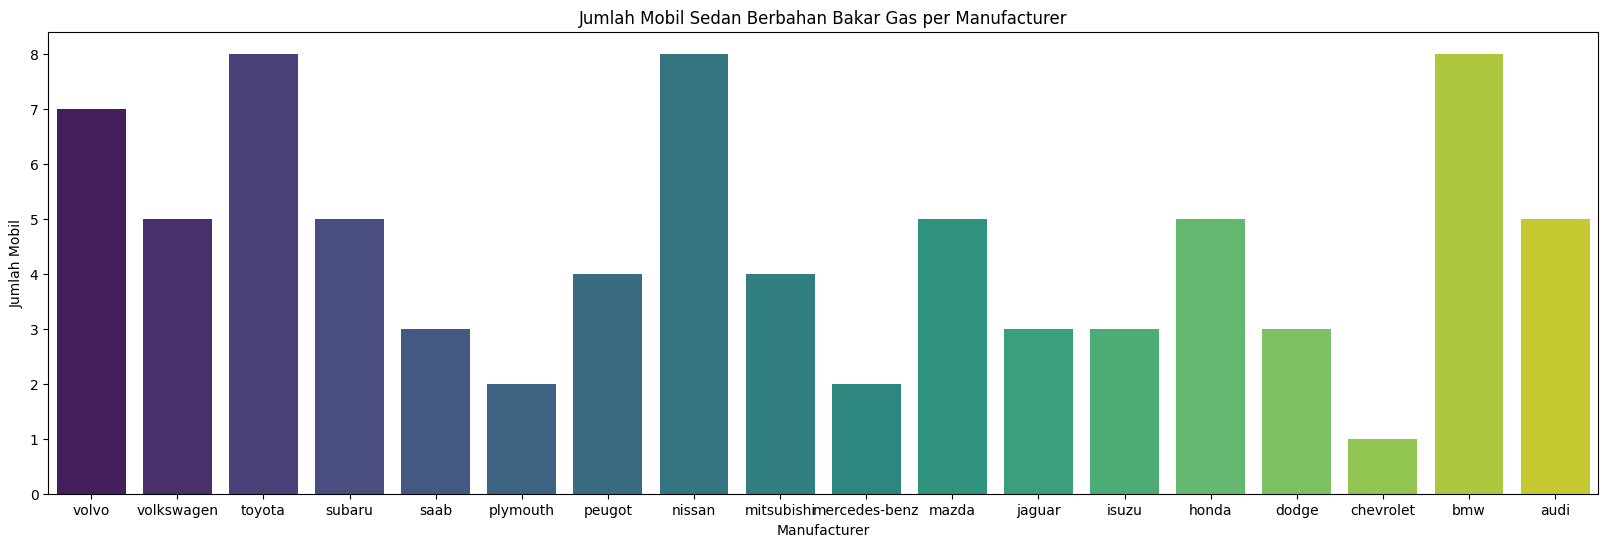

In [ ]:
# Langkah 2: Memfilter data untuk mendapatkan mobil dengan bahan bakar gas dan bertipe sedan
gas_sedan_df = uk[(uk['fuel-type'] == 'gas') & (uk['body-style'] == 'sedan')]

# Menampilkan beberapa baris pertama dari data yang difilter
print(gas_sedan_df.head())

# Langkah 3: Membuat chart untuk memvisualisasikan data
# Misalnya, kita ingin memvisualisasikan jumlah mobil gas bertipe sedan per manufacturer (make)
plt.figure(figsize=(20, 6))
sns.countplot(x='make', data=uk, palette='viridis')

# Menambahkan judul dan label
plt.title('Jumlah Mobil Sedan Berbahan Bakar Gas per Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Jumlah Mobil')